# Regression Week 4: Ridge Regression (interpretation)

In [144]:
import pandas as pd
import numpy as np

In [145]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the Data Frame:
    poly_frame = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_frame['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_frame[name] = poly_frame['power_1'].apply(lambda x: x**power)
    return poly_frame

In [146]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('data/kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [147]:
polynomial_feature = polynomial_sframe(sales['sqft_living'], 15)

In [169]:
polynomial_feature

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290.0,84100.0,2.438900e+07,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370.0,136900.0,5.065300e+07,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380.0,144400.0,5.487200e+07,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384.0,147456.0,5.662310e+07,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390.0,152100.0,5.931900e+07,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,9640.0,92929600.0,8.958413e+11,8.635911e+15,8.325018e+19,8.025317e+23,7.736406e+27,7.457895e+31,7.189411e+35,6.930592e+39,6.681091e+43,6.440572e+47,6.208711e+51,5.985197e+55,5.769730e+59
9254,9890.0,97812100.0,9.673617e+11,9.567207e+15,9.461968e+19,9.357886e+23,9.254949e+27,9.153145e+31,9.052460e+35,8.952883e+39,8.854401e+43,8.757003e+47,8.660676e+51,8.565409e+55,8.471189e+59
3914,10040.0,100801600.0,1.012048e+12,1.016096e+16,1.020161e+20,1.024241e+24,1.028338e+28,1.032452e+32,1.036581e+36,1.040728e+40,1.044891e+44,1.049070e+48,1.053266e+52,1.057480e+56,1.061709e+60
7252,12050.0,145202500.0,1.749690e+12,2.108377e+16,2.540594e+20,3.061416e+24,3.689006e+28,4.445252e+32,5.356529e+36,6.454617e+40,7.777813e+44,9.372265e+48,1.129358e+53,1.360876e+57,1.639856e+61


In [148]:
l2_small_penalty = 1.5e-5

In [180]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model = make_pipeline(
        StandardScaler(with_mean=False),
        Ridge(alpha=l2_small_penalty*polynomial_feature.shape[0],fit_intercept=True, tol=1e-3)
    )
model.fit(polynomial_feature, sales['price'])

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge(alpha=0.324195, tol=0.001))])

In [181]:
model["ridge"].coef_/model['standardscaler'].scale_

array([ 1.24873306e+02, -4.77376011e-02,  3.01446238e-05, -2.44419942e-09,
       -1.94153675e-13,  8.54085686e-18,  1.51142121e-21,  8.27979094e-26,
        6.52603100e-31, -3.27895017e-34, -3.87962315e-38, -2.72437650e-42,
       -1.07790800e-46,  3.78242694e-51,  1.39790296e-54])

In [23]:
set_1 = pd.read_csv('data/wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('data/wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('data/wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('data/wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [24]:
l2_small_penalty=1e-9

In [ ]:
set1_feature = polynomial_sframe(set_1['sqft_living'], 15)
set2_feature = polynomial_sframe(set_2['sqft_living'], 15)
set3_feature = polynomial_sframe(set_3['sqft_living'], 15)
set4_feature = polynomial_sframe(set_4['sqft_living'], 15)

In [46]:
model_1 = make_pipeline(
        StandardScaler(with_mean=False),
        Ridge(alpha=l2_small_penalty*set1_feature.shape[0],fit_intercept=True)
    )
model_1.fit(set1_feature, set_1['price'])

model_2 = make_pipeline(
        StandardScaler(with_mean=False),
        Ridge(alpha=l2_small_penalty*set2_feature.shape[0],fit_intercept=True)
    )
model_2.fit(set2_feature, set_2['price'])

model_3 = make_pipeline(
        StandardScaler(with_mean=False),
        Ridge(alpha=l2_small_penalty*set3_feature.shape[0],fit_intercept=True)
    )
model_3.fit(set3_feature, set_3['price'])

model_4 = make_pipeline(
        StandardScaler(with_mean=False),
        Ridge(alpha=l2_small_penalty*set4_feature.shape[0],fit_intercept=True)
    )
model_4.fit(set4_feature, set_4['price'])

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge(alpha=0.08103))])

In [48]:
import matplotlib.pyplot as plt

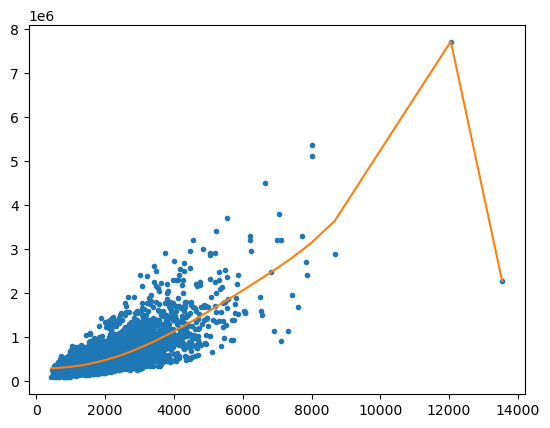

In [49]:
plt.plot(set1_feature[['power_1']],set_1['price'],'.',set1_feature[['power_1']], model_1.predict(set1_feature),'-')


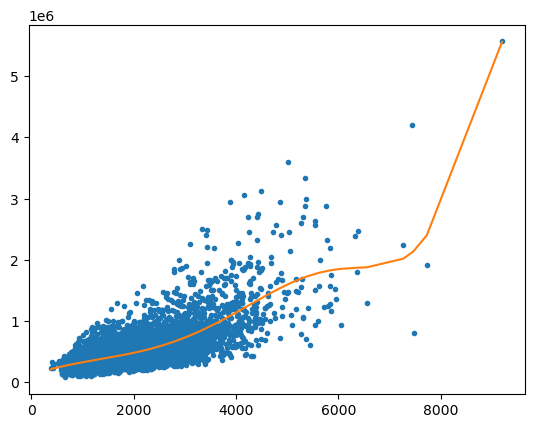

In [51]:
plt.plot(set2_feature[['power_1']],set_2['price'],'.',set2_feature[['power_1']], model_2.predict(set2_feature),'-')

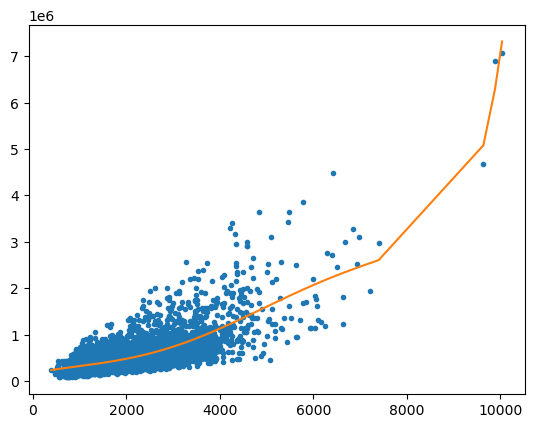

In [52]:
plt.plot(set3_feature[['power_1']],set_3['price'],'.',set3_feature[['power_1']], model_3.predict(set3_feature),'-')

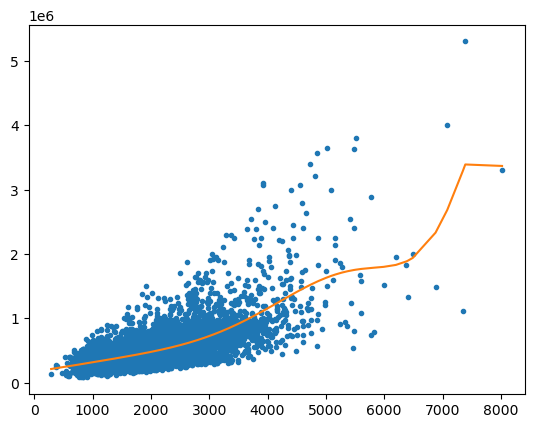

In [53]:
plt.plot(set4_feature[['power_1']],set_4['price'],'.',set4_feature[['power_1']], model_4.predict(set4_feature),'-')

In [58]:
print("Coefficient of feature power_1 for model 1:", (model_1["ridge"].coef_/model_1['standardscaler'].scale_)[0])
print("Coefficient of feature power_1 for model 2:", (model_2["ridge"].coef_/model_2['standardscaler'].scale_)[0])
print("Coefficient of feature power_1 for model 3:", (model_3["ridge"].coef_/model_3['standardscaler'].scale_)[0])
print("Coefficient of feature power_1 for model 4:", (model_4["ridge"].coef_/model_4['standardscaler'].scale_)[0])

Coefficient of feature power_1 for model 1: -15.210717829812092
Coefficient of feature power_1 for model 2: 288.18511530303334
Coefficient of feature power_1 for model 3: 187.17453637240536
Coefficient of feature power_1 for model 4: 129.00515479295444


In [62]:
l2_large_penalty=1.23e2

In [65]:
model_1 = make_pipeline(
        StandardScaler(with_mean=False),
        Ridge(alpha=l2_large_penalty*set1_feature.shape[0],fit_intercept=True)
    )
model_1.fit(set1_feature, set_1['price'])

model_2 = make_pipeline(
        StandardScaler(with_mean=False),
        Ridge(alpha=l2_large_penalty*set2_feature.shape[0],fit_intercept=True)
    )
model_2.fit(set2_feature, set_2['price'])

model_3 = make_pipeline(
        StandardScaler(with_mean=False),
        Ridge(alpha=l2_large_penalty*set3_feature.shape[0],fit_intercept=True)
    )
model_3.fit(set3_feature, set_3['price'])

model_4 = make_pipeline(
        StandardScaler(with_mean=False),
        Ridge(alpha=l2_large_penalty*set4_feature.shape[0],fit_intercept=True)
    )
model_4.fit(set4_feature, set_4['price'])

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge(alpha=664446.0))])

In [66]:
print("Coefficient of feature power_1 for model 1:", (model_1["ridge"].coef_/model_1['standardscaler'].scale_)[0])
print("Coefficient of feature power_1 for model 2:", (model_2["ridge"].coef_/model_2['standardscaler'].scale_)[0])
print("Coefficient of feature power_1 for model 3:", (model_3["ridge"].coef_/model_3['standardscaler'].scale_)[0])
print("Coefficient of feature power_1 for model 4:", (model_4["ridge"].coef_/model_4['standardscaler'].scale_)[0])

Coefficient of feature power_1 for model 1: 2.328068029579324
Coefficient of feature power_1 for model 2: 2.0975690277785493
Coefficient of feature power_1 for model 3: 2.2890625811892016
Coefficient of feature power_1 for model 4: 2.0859619409193053


# Cross - Validation 

In [68]:
train_valid_shuffled = pd.read_csv('data/wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('data/wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [74]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print(i, (int(start), int(end)))

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [138]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation
errors = []
def k_fold_cross_validation(k, l2_penalty, data, output):
    for i in range(k):
        start = int((n*i)/k)
        end = int((n*(i+1))/k)-1
        valid_feature = data[start:end+1]
        train_feature = pd.concat([data[0:start],data[end+1:n+1]])
        valid_output = output[start:end+1]
        train_output = pd.concat([output[0:start], output[end+1:n+1]])
        model = make_pipeline(
            StandardScaler(with_mean=False),
            Ridge(alpha=l2_penalty*train_feature.shape[0],fit_intercept=True)
            )
        model.fit(train_feature, train_output)
        errors.append(np.sum((model.predict(valid_feature)-valid_output)**2))
    return np.mean(errors)

In [137]:
l2_penalty=np.logspace(3, 9, num=13)
data = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)
output = train_valid_shuffled['price']

In [139]:
valid_error = []
for l2 in l2_penalty:
    error = k_fold_cross_validation(k, l2, data, output)
    print(f"L2 value {l2}, error {error}")
    valid_error.append(error)

L2 value 1000.0, error 264977361036975.94
L2 value 3162.2776601683795, error 265335148447647.1
L2 value 10000.0, error 265531555284169.9
L2 value 31622.776601683792, error 265648186840463.16
L2 value 100000.0, error 265722838383166.62
L2 value 316227.7660168379, error 265773838305759.6
L2 value 1000000.0, error 265810600896146.5
L2 value 3162277.6601683795, error 265838265283704.1
L2 value 10000000.0, error 265859808015598.4
L2 value 31622776.60168379, error 265877049596916.88
L2 value 100000000.0, error 265891158471417.16
L2 value 316227766.01683795, error 265902916483152.84
L2 value 1000000000.0, error 265912865749911.12


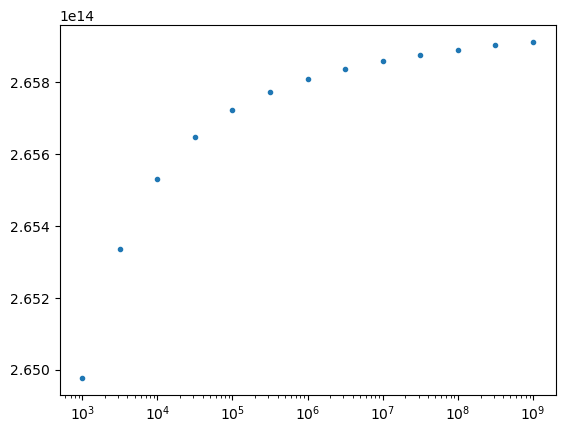

In [140]:
plt.xscale("log")
plt.plot(l2_penalty,valid_error,'.',)

In [143]:
train_feature = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)
final_model = make_pipeline(
            StandardScaler(with_mean=False),
            Ridge(alpha=1000*train_feature.shape[0],fit_intercept=True)
            )
final_model.fit(train_feature, train_valid_shuffled['price'])
test_feature = polynomial_sframe(test['sqft_living'], 15)
print("RSS_final:", "{:.2E}".format(np.sum((final_model.predict(test_feature)-test['price'])**2)))

RSS_final: 2.84E+14
